# Exam 2012 Q3

In [143]:
import sympy as sp
sp.init_printing()
import numpy as np

In [144]:
A = sp.Matrix([
    [-1,2,1,4],
    [1,2,2,6]
])
A

⎡-1  2  1  4⎤
⎢           ⎥
⎣1   2  2  6⎦

In [145]:
A.rref()[0]

⎡1  0  1/2   1 ⎤
⎢              ⎥
⎣0  1  3/4  5/2⎦

In [146]:
A.nullspace()

⎡⎡-1/2⎤  ⎡ -1 ⎤⎤
⎢⎢    ⎥  ⎢    ⎥⎥
⎢⎢-3/4⎥  ⎢-5/2⎥⎥
⎢⎢    ⎥, ⎢    ⎥⎥
⎢⎢ 1  ⎥  ⎢ 0  ⎥⎥
⎢⎢    ⎥  ⎢    ⎥⎥
⎣⎣ 0  ⎦  ⎣ 1  ⎦⎦

In [147]:
x1,x2,x3,x4 = sp.symbols("x_1 x_2 x_3 x_4")

X = sp.Matrix([x1,x2,x3,x4])
X

⎡x₁⎤
⎢  ⎥
⎢x₂⎥
⎢  ⎥
⎢x₃⎥
⎢  ⎥
⎣x₄⎦

In [148]:
sp.Eq(X, x3*A.nullspace()[0]+x4*A.nullspace()[1])

       ⎡    x₃       ⎤
       ⎢  - ── - x₄  ⎥
⎡x₁⎤   ⎢    2        ⎥
⎢  ⎥   ⎢             ⎥
⎢x₂⎥   ⎢  3⋅x₃   5⋅x₄⎥
⎢  ⎥ = ⎢- ──── - ────⎥
⎢x₃⎥   ⎢   4      2  ⎥
⎢  ⎥   ⎢             ⎥
⎣x₄⎦   ⎢     x₃      ⎥
       ⎢             ⎥
       ⎣     x₄      ⎦

## 2

In [157]:
a = sp.symbols("a")
A = sp.Matrix([
    [a, 2],
    [1,2]
])
A

⎡a  2⎤
⎢    ⎥
⎣1  2⎦

In [175]:
# 1. Construct the characteristic polynomium and calculate the eigenvalues of A

ctrl = A.charpoly().expand().factor() # control
ctrl

In [195]:
l = sp.symbols("lambda")
actual = (A-l*sp.eye(2)).det().expand()
actual

In [196]:
l1expr, l2expr = sp.solve(actual, l)

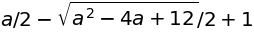

In [197]:
a = 3
l1expr

In [199]:
l1 = l1expr.subs({"a":a})
l1

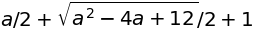

In [200]:
l2expr

In [202]:
l2 = l2expr.subs({"a":a})
l2

In [205]:
Aa3 = A.subs({"a":a})
Aa3

⎡3  2⎤
⎢    ⎥
⎣1  2⎦

In [207]:
l1, l2 = Aa3.eigenvals()

In [208]:
l1

In [209]:
l2

In [213]:
Aa3.eigenvects()

⎡⎛      ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡2⎤⎤⎞⎤
⎢⎜1, 1, ⎢⎢  ⎥⎥⎟, ⎜4, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

In [216]:
Aa3.diagonalize()[1]

⎡1  0⎤
⎢    ⎥
⎣0  4⎦

In [299]:
D = sp.diag(l1,l2)

In [300]:
V

⎡-1⎤
⎢  ⎥
⎣1 ⎦

In [415]:
def eigen(X, list_of_vals=False):
    Lt,Vt = [], []

    for ele in X.eigenvects():
        l,m,v = ele
        Lt.append(l)
        Vt.append(v[0])
    V = (Vt[0])
    for i, vect in enumerate(Vt):
        if i != 0:
            V = V.row_join(vect)
    if list_of_vals == False:
        D = sp.Matrix(np.diag(Lt))
        return (D, V)
    else:
        return (Lt,Vt)

L, V = eigen(Aa3)
L

⎡1  0⎤
⎢    ⎥
⎣0  4⎦

In [403]:
V

⎡-1  2⎤
⎢     ⎥
⎣1   1⎦

In [404]:
Lt = sp.Matrix([l1,l2])
Lt

⎡1⎤
⎢ ⎥
⎣4⎦

## 3

In [423]:
A = sp.Matrix([
    [-2,1,2],
    [-4,3,2],
    [-5,1,5]
])
A

⎡-2  1  2⎤
⎢        ⎥
⎢-4  3  2⎥
⎢        ⎥
⎣-5  1  5⎦

In [424]:
L, V = eigen(A, list_of_vals=True)
L

In [425]:
l1,l2,l3 = L
v1,v2,v3 = V

In [426]:
V = v1.row_join(v2).row_join(v3)
V

⎡1  1  1/2⎤
⎢         ⎥
⎢1  2  1/2⎥
⎢         ⎥
⎣1  1   1 ⎦

In [428]:
VL = V.row_join(sp.Matrix(L))
VL

⎡1  1  1/2  1⎤
⎢            ⎥
⎢1  2  1/2  2⎥
⎢            ⎥
⎣1  1   1   3⎦

In [436]:
C = VL.rref()[0][:,3]
C

⎡-2⎤
⎢  ⎥
⎢1 ⎥
⎢  ⎥
⎣4 ⎦

In [438]:
c1,c2,c3,t = sp.symbols("c_1 c_2 c_3 t")

xt = c1*sp.E**(l1*t)*v1+c2*sp.E**(l2*t)*v2+c3*sp.E**(l3*t)*v3
xt

⎡                       3⋅t ⎤
⎢     t       2⋅t   c₃⋅ℯ    ⎥
⎢ c₁⋅ℯ  + c₂⋅ℯ    + ─────── ⎥
⎢                      2    ⎥
⎢                           ⎥
⎢                        3⋅t⎥
⎢    t         2⋅t   c₃⋅ℯ   ⎥
⎢c₁⋅ℯ  + 2⋅c₂⋅ℯ    + ───────⎥
⎢                       2   ⎥
⎢                           ⎥
⎢     t       2⋅t       3⋅t ⎥
⎣ c₁⋅ℯ  + c₂⋅ℯ    + c₃⋅ℯ    ⎦

In [439]:
xt.subs({
    c1: C[0],
    c2: C[1],
    c3: C[2]
})

⎡    3⋅t    2⋅t      t ⎤
⎢ 2⋅ℯ    + ℯ    - 2⋅ℯ  ⎥
⎢                      ⎥
⎢   3⋅t      2⋅t      t⎥
⎢2⋅ℯ    + 2⋅ℯ    - 2⋅ℯ ⎥
⎢                      ⎥
⎢    3⋅t    2⋅t      t ⎥
⎣ 4⋅ℯ    + ℯ    - 2⋅ℯ  ⎦

## 4

In [446]:
t = sp.Matrix([0,1,2,3,4,5])
y = sp.Matrix([1,3,7,11,16,24])

In [447]:
# 1. Create the design matrix and the observationvector for the problem
b0, b2,ts = sp.symbols("beta_0 beta_2, t")
yt = b0+b2*ts**2
yt

In [451]:
X = sp.ones(len(t),1).row_join(t.applyfunc(lambda x: x**2))
X

⎡1  0 ⎤
⎢     ⎥
⎢1  1 ⎥
⎢     ⎥
⎢1  4 ⎥
⎢     ⎥
⎢1  9 ⎥
⎢     ⎥
⎢1  16⎥
⎢     ⎥
⎣1  25⎦

In [452]:
y

⎡1 ⎤
⎢  ⎥
⎢3 ⎥
⎢  ⎥
⎢7 ⎥
⎢  ⎥
⎢11⎥
⎢  ⎥
⎢16⎥
⎢  ⎥
⎣24⎦

In [460]:
B = ((X.T*X).inv()*X.T*y).evalf()
B.evalf()

⎡2.27027027027027⎤
⎢                ⎥
⎣0.87960687960688⎦

In [461]:
sp.Eq(sp.Matrix([b0,b2]), B)

⎡β₀⎤   ⎡2.27027027027027⎤
⎢  ⎥ = ⎢                ⎥
⎣β₂⎦   ⎣0.87960687960688⎦

# 5

From the sigma matrix it can be it can be seen that there is 3 singular values for the n = 4 matrix as such, the rank of A = 3 which makes it so that A doesn't span the entire R4, but a D3 plane in R3. As such Ax = b will only have a solution if b is located on said plane. Otherwise the solution would be inconsistent

## 6

In [477]:
def f(x):
    return sp.E**(-x)

def g(x):
    return sp.E**(-2*x)

C = [0,sp.oo]
interval = (x, C[0], C[1])
interval

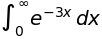

In [478]:
x = sp.symbols("x")
expr = sp.Integral(f(x)*g(x), interval)
expr

In [472]:
expr.doit()

In [473]:
# As 1/3 != 0, the two vectors arent orthogonal

In [480]:
# 2. Use Gram-Schmidt to construct the orthogonal basis for U
v1 = f(x)
v1

In [481]:
v2 = g(x) - sp.integrate(g(x)* v1, interval)/sp.integrate(v1*v1,interval)*v1
v2

In [483]:
sp.integrate(v1*v2,interval) == 0

True

In [484]:
# As such it is now orthogonal